In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set a seed to be consistent
np.random.seed(2)

# Num_data
N_full = 1000
N = 15

# Use quadratic function to generate the data
# y = 1/10 x^2 - 1/5 x + 3
X_full = np.random.rand(N_full) * 10
Y_full = 0.1 * X_full**2 - 0.2 * X_full + 3 + np.random.randn(N_full) * 0.2

X = X_full[:N]
Y = Y_full[:N]

# We'll fit polynomials of various degrees
degrees = [1, 2, 7, 14]
polys = [None] * len(degrees)
polys_full = [None] * len(degrees)
yhat_polys = [None] * len(degrees)
yhat_polys_full = [None] * len(degrees)

# We'll keep the true function to plot it when needed
xx = np.linspace(0, 10, 200)
ytrue = 0.1 * xx**2 - 0.2 * xx + 3

for (i, deg) in enumerate(degrees):
    polys[i] = np.polyfit(X, Y, deg=deg)
    yhat_polys[i] = np.polyval(polys[i], xx)
    
    polys_full[i] = np.polyfit(X_full, Y_full, deg=deg)
    yhat_polys_full[i] = np.polyval(polys_full[i], xx)



/home/varunk/.software/ml-stuff/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<IPython.core.display.Javascript object>


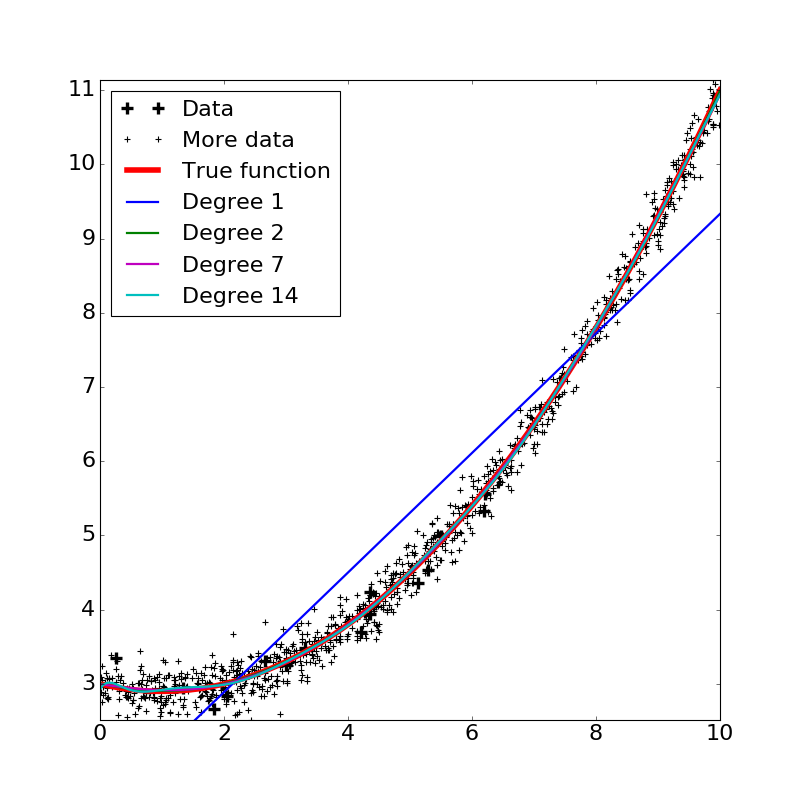

In [3]:
# Plot some subset of the various polynomial fits
def polyPlot(small_idx, full_idx, full=False, legend=False, plot_true=False):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.set_xlim((0, 10))
    ax.set_ylim((min(Y_full), max(Y_full)))
    ax.tick_params(axis='both', labelsize=20)
    
    colors = ['b', 'g', 'm', 'c']

    
    ax.plot(X, Y, ls='', marker='+', markersize='10', c='k', markeredgewidth='3', label='Data')
    
    if full is True:
        ax.plot(X_full[N:], Y_full[N:], ls='', marker='+', markersize='6', markeredgewidth='1', c='k', label='More data')
    if plot_true is True:
        ax.plot(xx, ytrue, lw=5, label='True function', c='r')
    
    for i in small_idx:
        ax.plot(xx, yhat_polys[i], label='Degree ' + str(degrees[i]), lw=2, c=colors[i])
    for i in full_idx:
        ax.plot(xx, yhat_polys_full[i], label='Degree ' + str(degrees[i]), lw=2, c=colors[i])
    
    
    
    if legend is True:
        ax.legend(fontsize=20, loc='upper left')


polyPlot(small_idx=[], full_idx=[0, 1, 2, 3], full=True, plot_true=True, legend=True)

In [4]:
# Figure in 3d
def linfunc(x1, x2):
    return 1 + 2 * x1 - 3 * x2
    
def polyd2(x1, x2):
    return 1 - x1**2 - x2**2

N = 40
D = 2
sigma = 0.5
X2d = np.random.randn(N, D)

Zlin = linfunc(X2d[:, 0], X2d[:, 1]) + np.random.randn(N)
Zd2 = polyd2(X2d[:, 0], X2d[:, 1]) + np.random.randn(N)

<IPython.core.display.Javascript object>


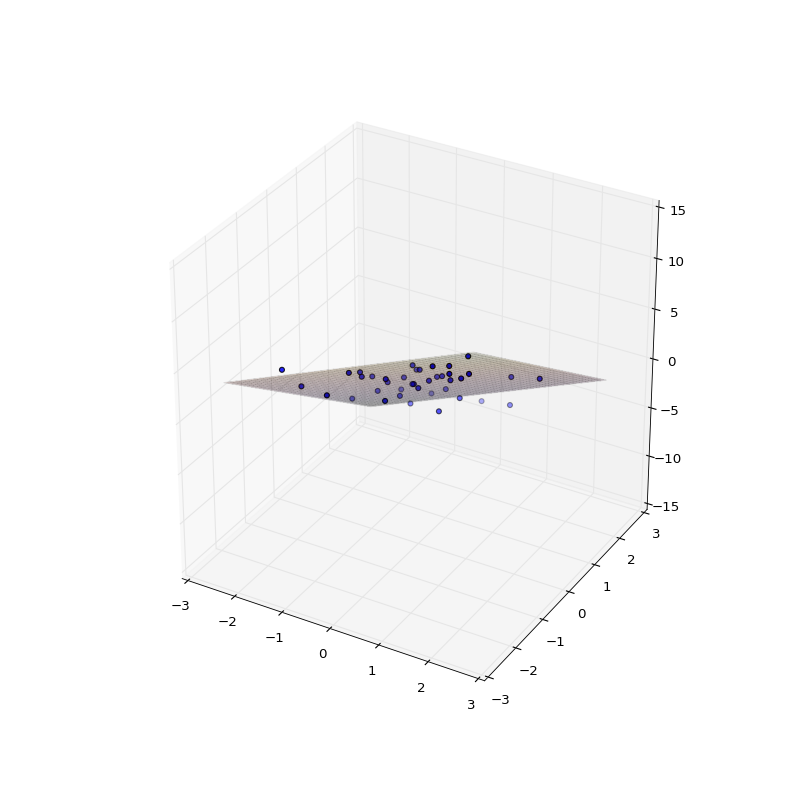

In [5]:
fig = plt.figure()

xx, yy = np.meshgrid(np.linspace(-2.5, 2.5, 400), np.linspace(-2.5, 2.5, 400))
zz = linfunc(xx.ravel(), yy.ravel()).reshape(xx.shape)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap=plt.cm.inferno, alpha=0.1)

ax.scatter(X2d[:, 0], X2d[:, 1], Zlin)

<IPython.core.display.Javascript object>


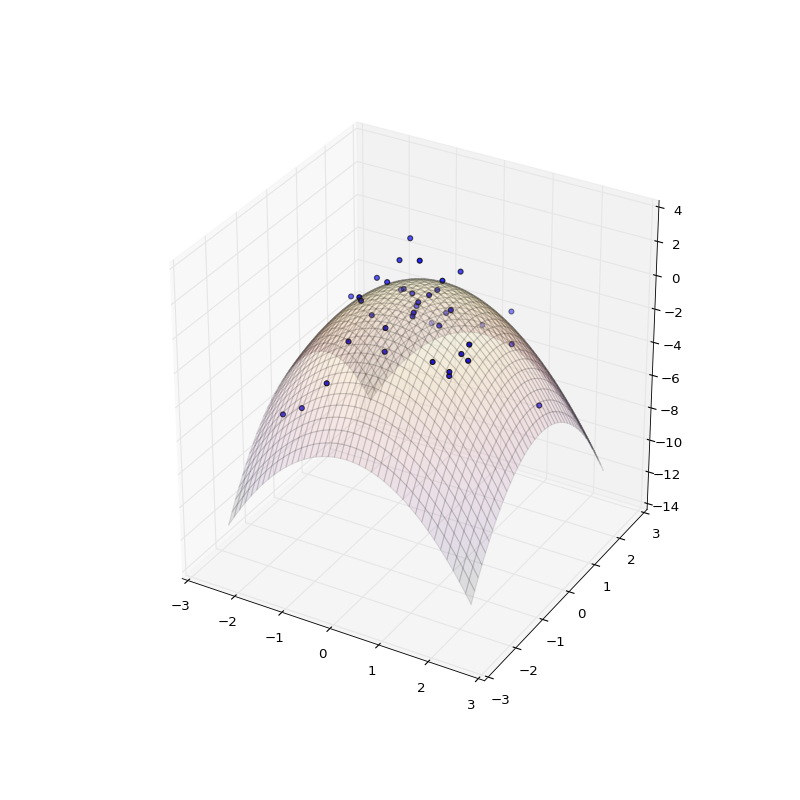

In [6]:
fig = plt.figure()

xx, yy = np.meshgrid(np.linspace(-2.5, 2.5, 400), np.linspace(-2.5, 2.5, 400))
zz = polyd2(xx.ravel(), yy.ravel()).reshape(xx.shape)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap=plt.cm.inferno, alpha=0.1)

ax.scatter(X2d[:, 0], X2d[:, 1], Zd2)